In [15]:
train_file_path= r"/Users/np10002274373/ineuron/Projects/Housing_project/housing/artifact/data_ingestion/2022-07-25-20-40-17/ingested_data/train/housing.csv"

In [16]:
import pandas as pd

In [17]:
df= pd.read_csv(train_file_path)

In [18]:
df.shape

(16512, 10)

In [19]:
x,y= df.drop("median_house_value", axis=1), df["median_house_value"]

In [20]:
x.shape, y.shape

((16512, 9), (16512,))

In [21]:
x.isna().sum() #null values in total_bedrooms.

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [22]:
from sklearn.impute import SimpleImputer


In [23]:
numerical_column= x.drop(columns= ["ocean_proximity"], axis=1)

In [24]:
simpleimputer= SimpleImputer(strategy="median")

In [25]:
simpleimputer.fit_transform(numerical_column)

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [26]:
df= simpleimputer.transform(numerical_column)

In [27]:
simpleimputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [28]:
simpleimputer.statistics_  #if any null value, these values used to impute

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [29]:
x.ocean_proximity

0            INLAND
1        NEAR OCEAN
2            INLAND
3        NEAR OCEAN
4         <1H OCEAN
            ...    
16507     <1H OCEAN
16508        INLAND
16509     <1H OCEAN
16510     <1H OCEAN
16511        INLAND
Name: ocean_proximity, Length: 16512, dtype: object

In [30]:
simple_imputer= SimpleImputer(strategy="most_frequent")

In [31]:
#creating custom transformer. every transformer should have at least two methods- fit and transform

class FeatureGenerator():
    

    def __init__(self,strategy= "median"):
        self.strategy= strategy


    def fit(self,X):
        self.features= X.columns
        self.statistics= []
        for column in X.columns:
            self.statistics.append(X[column].median())



    def transform(self,X):
        for idx, column in enumerate(X.columns):
            X[column].fillna(self.statistics[idx])
        
        return X

    def fit_transform(self,X):
        self.fit(X)
        return self.transform(X)


In [32]:
for idx, columns in enumerate(x.columns):
    print (idx, columns)

0 longitude
1 latitude
2 housing_median_age
3 total_rooms
4 total_bedrooms
5 population
6 households
7 median_income
8 ocean_proximity


In [33]:
from sklearn.base import TransformerMixin, BaseEstimator
import numpy as np

#by inheriting TransformerMixin, I don't have to explicitly write fit_transform.
#Only requirement for custom transformer- should have fit and transform methods.

COLUMN_TOTAL_ROOMS = "total_rooms"
COLUMN_POPULATION = "population"
COLUMN_HOUSEHOLDS = "households"
COLUMN_TOTAL_BEDROOM = "total_bedrooms"

class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True,
                 total_rooms_ix=3,
                 population_ix=5,
                 households_ix=6,
                 total_bedrooms_ix=4, columns=None):
        """
        FeatureGenerator Initialization
        add_bedrooms_per_room: bool
        total_rooms_ix: int index number of total rooms columns
        population_ix: int index number of total population columns
        households_ix: int index number of  households columns
        total_bedrooms_ix: int index number of bedrooms columns
        """
        try:
            self.columns = columns
            if self.columns is not None:
                total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                population_ix = self.columns.index(COLUMN_POPULATION)
                households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.add_bedrooms_per_room = add_bedrooms_per_room
            self.total_rooms_ix = total_rooms_ix
            self.population_ix = population_ix
            self.households_ix = households_ix
            self.total_bedrooms_ix = total_bedrooms_ix
        except Exception as e:
            raise e

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            room_per_household = X[:, self.total_rooms_ix] / \
                                 X[:, self.households_ix]
            population_per_household = X[:, self.population_ix] / \
                                       X[:, self.households_ix]
            if self.add_bedrooms_per_room:
                bedrooms_per_room = X[:, self.total_bedrooms_ix] / \
                                    X[:, self.total_rooms_ix]
                generated_feature = np.c_[
                    X, room_per_household, population_per_household, bedrooms_per_room]
            else:
                generated_feature = np.c_[
                    X, room_per_household, population_per_household]
#np.c_ is used for concatenation
            return generated_feature
        except Exception as e:
            raise e

In [34]:
arr1= np.arange(10)
arr2=  np.arange(5,15)

np.c_[arr1, arr2]

array([[ 0,  5],
       [ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10],
       [ 6, 11],
       [ 7, 12],
       [ 8, 13],
       [ 9, 14]])

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [49]:
num_pipeline= Pipeline(steps=[('imputer', SimpleImputer(strategy="median")),
('feature_generator', FeatureGenerator()),
('scaling',StandardScaler())


])

In [52]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline= Pipeline(steps=[('imputer', SimpleImputer(strategy="most_frequent")),
('oneHotEncoder', OneHotEncoder()),
('scaling',StandardScaler(with_mean=False))
])

In [40]:
df= pd.read_csv(train_file_path)
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [44]:
num_column_name= ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

cat_column_name= ['ocean_proximity']

In [53]:
preprocessing= ColumnTransformer([('num_pipeline', num_pipeline, num_column_name),
                                ('cat_pipeline', cat_pipeline, cat_column_name)])

In [61]:
train_df= preprocessing.fit_transform(df)

In [55]:
#next time we can use preprocessing.transform(new_dataset)

import dill


In [57]:
with open('preprocessing.pkl',"wb") as prep_file:
    dill.dump(preprocessing, prep_file)

In [58]:
with open('preprocessing.pkl', "rb") as file_obj:
    preprocessing_loaded_obj= dill.load(file_obj)

In [ ]:
#use the below to load the pickle object and run the feature engineering
# preprocessing_loaded_obj.transform(new dataframe)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr= LinearRegression()

In [67]:
x= train_df
y= np.array(df.median_house_value)

In [66]:
x= train_df
y= np.array(df.median_house_value)

In [69]:
lr.fit(x,y)

LinearRegression()

In [70]:
lr.fit_intercept

True

In [73]:
lr.coef_

array([-5.56496335e+04, -5.67115975e+04,  1.37347199e+04, -1.94305946e+03,
        7.34323154e+03, -4.57092825e+04,  4.54532649e+04,  7.47141524e+04,
        6.60458416e+03,  1.04305480e+03,  9.24831527e+03,  3.42521252e+12,
        3.21473047e+12,  7.59244104e+10,  2.17453983e+12,  2.30977862e+12])

In [72]:
lr.intercept_

-6899101776852.307

In [74]:
y_hat=  lr.predict(x)


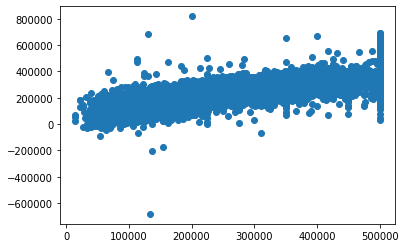

In [75]:
import matplotlib.pyplot as plt
plt.plot(y,y_hat,"o")


In [76]:
from sklearn.metrics import r2_score
r2_score(y,y_hat)


0.6481553633160378

In [78]:
test_file_path= r"/Users/np10002274373/ineuron/Projects/Housing_project/housing/artifact/data_ingestion/2022-07-25-20-40-17/ingested_data/test/housing.csv"
test_df= pd.read_csv(test_file_path)

In [79]:
test_arr= preprocessing.transform(test_df)

In [81]:
yhat_test= lr.predict(test_arr)
y_test= np.array(test_df.median_house_value)

In [82]:
r2_score(y_test, yhat_test)

0.6564599200517354